In [1]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
text = """I've always been drawn to sports—not just for the thrill of the game, but for everything they represent.
There's something amazing about watching a last-minute goal or a buzzer-beater shot, knowing the sheer effort and heart that went into that moment.
I love how sports bring people together, whether it's friends cheering for their team or strangers bonding over a shared win (or loss).
And it's not just about winning—it's about the hustle, the teamwork, and learning to pick yourself up after a tough loss.
Athletes inspire me with how far they push themselves, physically and mentally.
For me, sports are more than just games—they’re stories of passion, resilience, and connection."""

# Convert to lowercase
text_lower = text.lower()

# Remove punctuation
text_clean = re.sub(r'[^\w\s]', '', text_lower)

print(text_clean)


ive always been drawn to sportsnot just for the thrill of the game but for everything they represent 
theres something amazing about watching a lastminute goal or a buzzerbeater shot knowing the sheer effort and heart that went into that moment 
i love how sports bring people together whether its friends cheering for their team or strangers bonding over a shared win or loss 
and its not just about winningits about the hustle the teamwork and learning to pick yourself up after a tough loss 
athletes inspire me with how far they push themselves physically and mentally 
for me sports are more than just gamestheyre stories of passion resilience and connection


In [3]:
sentences = sent_tokenize(text)
print("Sentences:", sentences)

words = word_tokenize(text_clean)
print("Words:", words)


Sentences: ["I've always been drawn to sports—not just for the thrill of the game, but for everything they represent.", "There's something amazing about watching a last-minute goal or a buzzer-beater shot, knowing the sheer effort and heart that went into that moment.", "I love how sports bring people together, whether it's friends cheering for their team or strangers bonding over a shared win (or loss).", "And it's not just about winning—it's about the hustle, the teamwork, and learning to pick yourself up after a tough loss.", 'Athletes inspire me with how far they push themselves, physically and mentally.', 'For me, sports are more than just games—they’re stories of passion, resilience, and connection.']
Words: ['ive', 'always', 'been', 'drawn', 'to', 'sportsnot', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'theres', 'something', 'amazing', 'about', 'watching', 'a', 'lastminute', 'goal', 'or', 'a', 'buzzerbeater', 'shot', 'kn

In [4]:
# Using split()
split_words = text_clean.split()
print("Split words:", split_words)

# Using word_tokenize()
tokenized_words = word_tokenize(text_clean)
print("Tokenized words:", tokenized_words)


Split words: ['ive', 'always', 'been', 'drawn', 'to', 'sportsnot', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'theres', 'something', 'amazing', 'about', 'watching', 'a', 'lastminute', 'goal', 'or', 'a', 'buzzerbeater', 'shot', 'knowing', 'the', 'sheer', 'effort', 'and', 'heart', 'that', 'went', 'into', 'that', 'moment', 'i', 'love', 'how', 'sports', 'bring', 'people', 'together', 'whether', 'its', 'friends', 'cheering', 'for', 'their', 'team', 'or', 'strangers', 'bonding', 'over', 'a', 'shared', 'win', 'or', 'loss', 'and', 'its', 'not', 'just', 'about', 'winningits', 'about', 'the', 'hustle', 'the', 'teamwork', 'and', 'learning', 'to', 'pick', 'yourself', 'up', 'after', 'a', 'tough', 'loss', 'athletes', 'inspire', 'me', 'with', 'how', 'far', 'they', 'push', 'themselves', 'physically', 'and', 'mentally', 'for', 'me', 'sports', 'are', 'more', 'than', 'just', 'gamestheyre', 'stories', 'of', 'passion', 'resilience', 'and', 'connect

In [5]:
stop_words = set(stopwords.words('english'))

filtered_words = [word for word in tokenized_words if word not in stop_words]
print("Filtered Words:", filtered_words)


Filtered Words: ['ive', 'always', 'drawn', 'sportsnot', 'thrill', 'game', 'everything', 'represent', 'theres', 'something', 'amazing', 'watching', 'lastminute', 'goal', 'buzzerbeater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sports', 'bring', 'people', 'together', 'whether', 'friends', 'cheering', 'team', 'strangers', 'bonding', 'shared', 'win', 'loss', 'winningits', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athletes', 'inspire', 'far', 'push', 'physically', 'mentally', 'sports', 'gamestheyre', 'stories', 'passion', 'resilience', 'connection']


<Axes: title={'center': 'Word Frequency (without Stopwords)'}, xlabel='Samples', ylabel='Counts'>

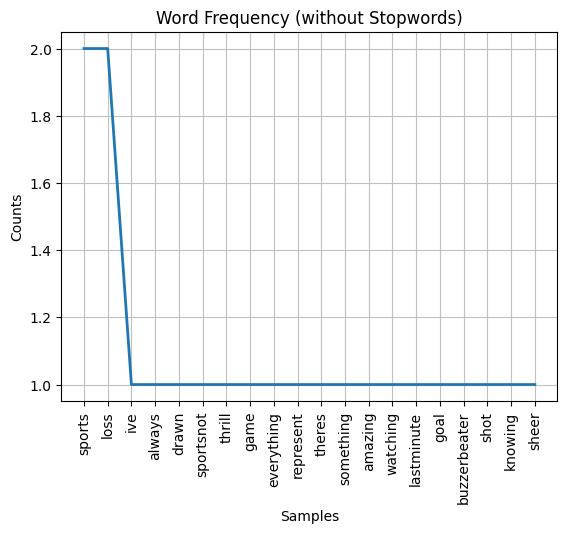

In [6]:
fdist = FreqDist(filtered_words)

fdist.plot(20, title="Word Frequency (without Stopwords)")


Q2. Using the same paragraph from Q1:

1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other.

In [7]:
text_lower = text.lower()

alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', text_lower)
print("Alphabetic Words:", alphabetic_words)

Alphabetic Words: ['i', 've', 'always', 'been', 'drawn', 'to', 'sports', 'not', 'just', 'for', 'the', 'thrill', 'of', 'the', 'game', 'but', 'for', 'everything', 'they', 'represent', 'there', 's', 'something', 'amazing', 'about', 'watching', 'a', 'last', 'minute', 'goal', 'or', 'a', 'buzzer', 'beater', 'shot', 'knowing', 'the', 'sheer', 'effort', 'and', 'heart', 'that', 'went', 'into', 'that', 'moment', 'i', 'love', 'how', 'sports', 'bring', 'people', 'together', 'whether', 'it', 's', 'friends', 'cheering', 'for', 'their', 'team', 'or', 'strangers', 'bonding', 'over', 'a', 'shared', 'win', 'or', 'loss', 'and', 'it', 's', 'not', 'just', 'about', 'winning', 'it', 's', 'about', 'the', 'hustle', 'the', 'teamwork', 'and', 'learning', 'to', 'pick', 'yourself', 'up', 'after', 'a', 'tough', 'loss', 'athletes', 'inspire', 'me', 'with', 'how', 'far', 'they', 'push', 'themselves', 'physically', 'and', 'mentally', 'for', 'me', 'sports', 'are', 'more', 'than', 'just', 'games', 'they', 're', 'stories

In [8]:
stop_words = set(stopwords.words('english'))

filtered_words = [word for word in alphabetic_words if word not in stop_words]
print("Filtered Words:", filtered_words)

Filtered Words: ['always', 'drawn', 'sports', 'thrill', 'game', 'everything', 'represent', 'something', 'amazing', 'watching', 'last', 'minute', 'goal', 'buzzer', 'beater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sports', 'bring', 'people', 'together', 'whether', 'friends', 'cheering', 'team', 'strangers', 'bonding', 'shared', 'win', 'loss', 'winning', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athletes', 'inspire', 'far', 'push', 'physically', 'mentally', 'sports', 'games', 'stories', 'passion', 'resilience', 'connection']


In [9]:
porter = PorterStemmer()

stemmed_words = [porter.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['alway', 'drawn', 'sport', 'thrill', 'game', 'everyth', 'repres', 'someth', 'amaz', 'watch', 'last', 'minut', 'goal', 'buzzer', 'beater', 'shot', 'know', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sport', 'bring', 'peopl', 'togeth', 'whether', 'friend', 'cheer', 'team', 'stranger', 'bond', 'share', 'win', 'loss', 'win', 'hustl', 'teamwork', 'learn', 'pick', 'tough', 'loss', 'athlet', 'inspir', 'far', 'push', 'physic', 'mental', 'sport', 'game', 'stori', 'passion', 'resili', 'connect']


In [10]:
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['always', 'drawn', 'sport', 'thrill', 'game', 'everything', 'represent', 'something', 'amazing', 'watching', 'last', 'minute', 'goal', 'buzzer', 'beater', 'shot', 'knowing', 'sheer', 'effort', 'heart', 'went', 'moment', 'love', 'sport', 'bring', 'people', 'together', 'whether', 'friend', 'cheering', 'team', 'stranger', 'bonding', 'shared', 'win', 'loss', 'winning', 'hustle', 'teamwork', 'learning', 'pick', 'tough', 'loss', 'athlete', 'inspire', 'far', 'push', 'physically', 'mentally', 'sport', 'game', 'story', 'passion', 'resilience', 'connection']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF

In [11]:
texts = [
    "Breakthrough in Battery Tech Promises EVs with 1,000km Range by 2026",
    "Crisp sound, strong bass, and they actually stay in my ears while running—these earbuds are a game-changer for workouts!",
    "Sunsets hit different when you’re on a mountain top. Grateful for views like this #Wanderlust #NatureFix"
]

In [12]:
count_vectorizer = CountVectorizer()

count_matrix = count_vectorizer.fit_transform(texts)

# Show feature names
print("Vocabulary:", count_vectorizer.get_feature_names_out())

# Show Bag of Words Matrix
print("Bag of Words Matrix:\n", count_matrix.toarray())

Vocabulary: ['000km' '2026' 'actually' 'and' 'are' 'bass' 'battery' 'breakthrough'
 'by' 'changer' 'crisp' 'different' 'earbuds' 'ears' 'evs' 'for' 'game'
 'grateful' 'hit' 'in' 'like' 'mountain' 'my' 'naturefix' 'on' 'promises'
 'range' 're' 'running' 'sound' 'stay' 'strong' 'sunsets' 'tech' 'these'
 'they' 'this' 'top' 'views' 'wanderlust' 'when' 'while' 'with' 'workouts'
 'you']
Bag of Words Matrix:
 [[1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1
  0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0
  1 1 1 1 1 0 0 0 1]]


In [13]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Show TF-IDF Matrix
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.30746099 0.30746099 0.         0.         0.         0.
  0.30746099 0.30746099 0.30746099 0.         0.         0.
  0.         0.         0.30746099 0.         0.         0.
  0.         0.23383201 0.         0.         0.         0.
  0.         0.30746099 0.30746099 0.         0.         0.
  0.         0.         0.         0.30746099 0.         0.
  0.         0.         0.         0.         0.         0.
  0.30746099 0.         0.        ]
 [0.         0.         0.22847492 0.22847492 0.22847492 0.22847492
  0.         0.         0.         0.22847492 0.22847492 0.
  0.22847492 0.22847492 0.         0.17376106 0.22847492 0.
  0.         0.17376106 0.         0.         0.22847492 0.
  0.         0.         0.         0.         0.22847492 0.22847492
  0.22847492 0.22847492 0.         0.         0.22847492 0.22847492
  0.         0.         0.         0.         0.         0.22847492
  0.         0.22847492 0.        ]
 [0.         0.         0.         0.   

In [14]:
# Loop over each text (row)
for i in range(len(texts)):
    print(f"\nText {i+1}: {texts[i]}")

    # Get the row
    row = tfidf_matrix[i].toarray()[0]

    # Find indices of top 3 scores
    top_indices = row.argsort()[-3:][::-1]

    # Print top keywords
    for idx in top_indices:
        print(f"   {feature_names[idx]} (Score: {row[idx]:.3f})")


Text 1: Breakthrough in Battery Tech Promises EVs with 1,000km Range by 2026
   with (Score: 0.307)
   tech (Score: 0.307)
   2026 (Score: 0.307)

Text 2: Crisp sound, strong bass, and they actually stay in my ears while running—these earbuds are a game-changer for workouts!
   workouts (Score: 0.228)
   while (Score: 0.228)
   these (Score: 0.228)

Text 3: Sunsets hit different when you’re on a mountain top. Grateful for views like this #Wanderlust #NatureFix
   you (Score: 0.253)
   when (Score: 0.253)
   top (Score: 0.253)


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

1. Preprocess and tokenize both texts.
2. Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity() c. Analyze which similarity metric gives beƩer insights in your case

In [15]:
text1 = """Artificial Intelligence is a field of computer science that focuses on creating machines capable of mimicking human intelligence. It includes areas like machine learning, natural language processing, and robotics. AI systems are designed to solve problems, make decisions, and learn from experience."""

text2 = """Blockchain is a decentralized and secure technology that stores data in blocks connected in a chain. It enables transparent, tamper-proof transactions without the need for intermediaries. Blockchain powers cryptocurrencies like Bitcoin and supports smart contracts."""

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print("Tokens 1:", tokens1)
print("Tokens 2:", tokens2)


Tokens 1: ['artificial', 'intelligence', 'field', 'computer', 'science', 'focuses', 'creating', 'machines', 'capable', 'mimicking', 'human', 'intelligence', 'includes', 'areas', 'like', 'machine', 'learning', 'natural', 'language', 'processing', 'robotics', 'ai', 'systems', 'designed', 'solve', 'problems', 'make', 'decisions', 'learn', 'experience']
Tokens 2: ['blockchain', 'decentralized', 'secure', 'technology', 'stores', 'data', 'blocks', 'connected', 'chain', 'enables', 'transparent', 'tamperproof', 'transactions', 'without', 'need', 'intermediaries', 'blockchain', 'powers', 'cryptocurrencies', 'like', 'bitcoin', 'supports', 'smart', 'contracts']


In [16]:
set1 = set(tokens1)
set2 = set(tokens2)

jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", round(jaccard_sim, 3))

Jaccard Similarity: 0.02


In [17]:
corpus = [text1, text2]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 3))

Cosine Similarity: 0.018


Q5. Write a short review for a product or service.

1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews

In [18]:
review = """I recently tried out the Ember Temperature Control Smart Mug, and it’s honestly a small luxury that makes a big difference.
            I love how it keeps my coffee at the perfect temperature for hours—no more rushing to drink it before it gets cold.
            The app integration is simple and works smoothly, letting me set my ideal heat level.
            It’s a bit pricey, but if you're someone who sips slowly or gets distracted during the day, it’s totally worth it.
            Overall, it feels like a thoughtful upgrade to a daily routine."""

blob = TextBlob(review)
polarity = blob.sentiment.polarity   # between -1 (negative) and 1 (positive)
subjectivity = blob.sentiment.subjectivity  # between 0 (objective) and 1 (subjective)

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")


Polarity: 0.1915178571428571
Subjectivity: 0.459375


In [19]:
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Sentiment:", sentiment)

Sentiment: Positive


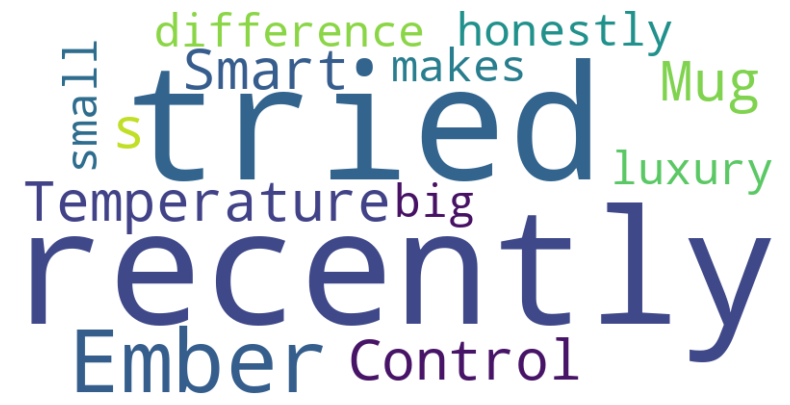

In [20]:
positive_reviews = """I recently tried out the Ember Temperature Control Smart Mug, and it’s honestly a small luxury that makes a big difference."""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.

1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you

In [21]:
paragraph = """Artificial intelligence is transforming the world.
It is helping industries automate tasks and make smarter decisions.
Machine learning, a subset of AI, enables computers to learn from data.
Natural language processing allows machines to understand human languages.
The future with AI promises efficiency and innovation across all sectors."""


In [22]:
# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])

# Create input sequences
sequences = []
total_words = len(tokenizer.word_index) + 1

# Generate sequences of words
for line in paragraph.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

# Split data into features and labels
X = sequences[:, :-1]
y = sequences[:, -1]
y = np.array(y)


In [23]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0000e+00 - loss: 3.7842
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0259 - loss: 3.7818 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0673 - loss: 3.7794
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0518 - loss: 3.7774
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0518 - loss: 3.7746
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0518 - loss: 3.7721
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0518 - loss: 3.7690
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1037 - loss: 3.7658
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0933 - loss: 3.7620
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0673 - loss: 3.7563
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0414 - loss: 3.7511
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0518

In [25]:
seed_text = "Artificial intelligence"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted)

    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

Artificial intelligence is transforming the world tasks
